In [2]:
# Check for NVIDIA GPU
!nvidia-smi

Tue Aug 22 02:28:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Set up workspace directory

import os
root_dir = os.getcwd()
print(root_dir)

from IPython import display


/content


In [ ]:
# Install Roboflow and Dataset (with private API key)

%pip install roboflow

from roboflow import Roboflow
# api_key = open("api_key.txt","r").read().strip()

print("Downloading dataset from Robotflow")
rf = Roboflow(api_key="7oQ81Xl9cu8le6zWHRdx")
project = rf.workspace("sepb").project("chips-uncropped")
dataset = project.version(2).download("yolov5")
display.clear_output()


print("Fixing incorrect paths in 'data.yaml'")
import yaml
dataset_yaml_path = os.path.join(dataset.location, "data.yaml")
with open(dataset_yaml_path) as data_yaml:
    doc = yaml.safe_load(data_yaml)
doc['train'] = "../train/images"
doc['val'] = "../valid/images"
with open(dataset_yaml_path, 'w') as data_yaml:
    yaml.dump(doc, data_yaml)


Fixing incorrect paths in 'data.yaml'


# Download YOLO model and start training.


In [ ]:
# Install dependencies from Ultralytics

%pip install ultralytics==8.0.20
import ultralytics
ultralytics.checks()
display.clear_output()

# Install YOLO model
from ultralytics import YOLO
from IPython.display import display, Image
!git clone https://github.com/ultralytics/yolov5
%cd ./yolov5
%pip install -r ./requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15921, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 15921 (delta 16), reused 22 (delta 8), pack-reused 15880
Receiving objects: 100% (15921/15921), 14.66 MiB | 23.42 MiB/s, done.
Resolving deltas: 100% (10911/10911), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.20
    Uninstalling ultralytics-8.0.20:
      Successfully uninstalled ultralytics-8.0.20


In [ ]:
%cd {root_dir}

epochs = 30
image_size = 1000

model_choice = input("Enter the model choice (0 for small, 1 for medium, 2 for large, 3 for extra large): ")
if model_choice == "0":
    model_name = "yolov5s.pt"
elif model_choice == "1":
    model_name = "yolov5m.pt"
elif model_choice == "2":
    model_name = "yolov5l.pt"
elif model_choice == "3":
    model_name = "yolov5x.pt"
else:
    print("Invalid model choice. Please choose 0-3.")
    exit()

print("Training model: " + model_name)

!yolo task=detect mode=train model={model_name} data="{dataset_yaml_path}" epochs={epochs}  imgsz={image_size} plots=True

/content
Enter the model choice (0 for small, 1 for medium, 2 for large, 3 for extra large): 1
Training model: yolov5m.pt
WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'.
PRO TIP 💡 Replace 'model=yolov5m.pt' with new 'model=yolov5mu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

100% 48.2M/48.2M [00:00<00:00, 53.3MB/s]
Ultralytics YOLOv8.0.157 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5m.pt, data=/content/Chips-Uncropped-2/data.yaml, epochs=30, patience=50, batch=16, imgsz=1000, save=True, save

/content


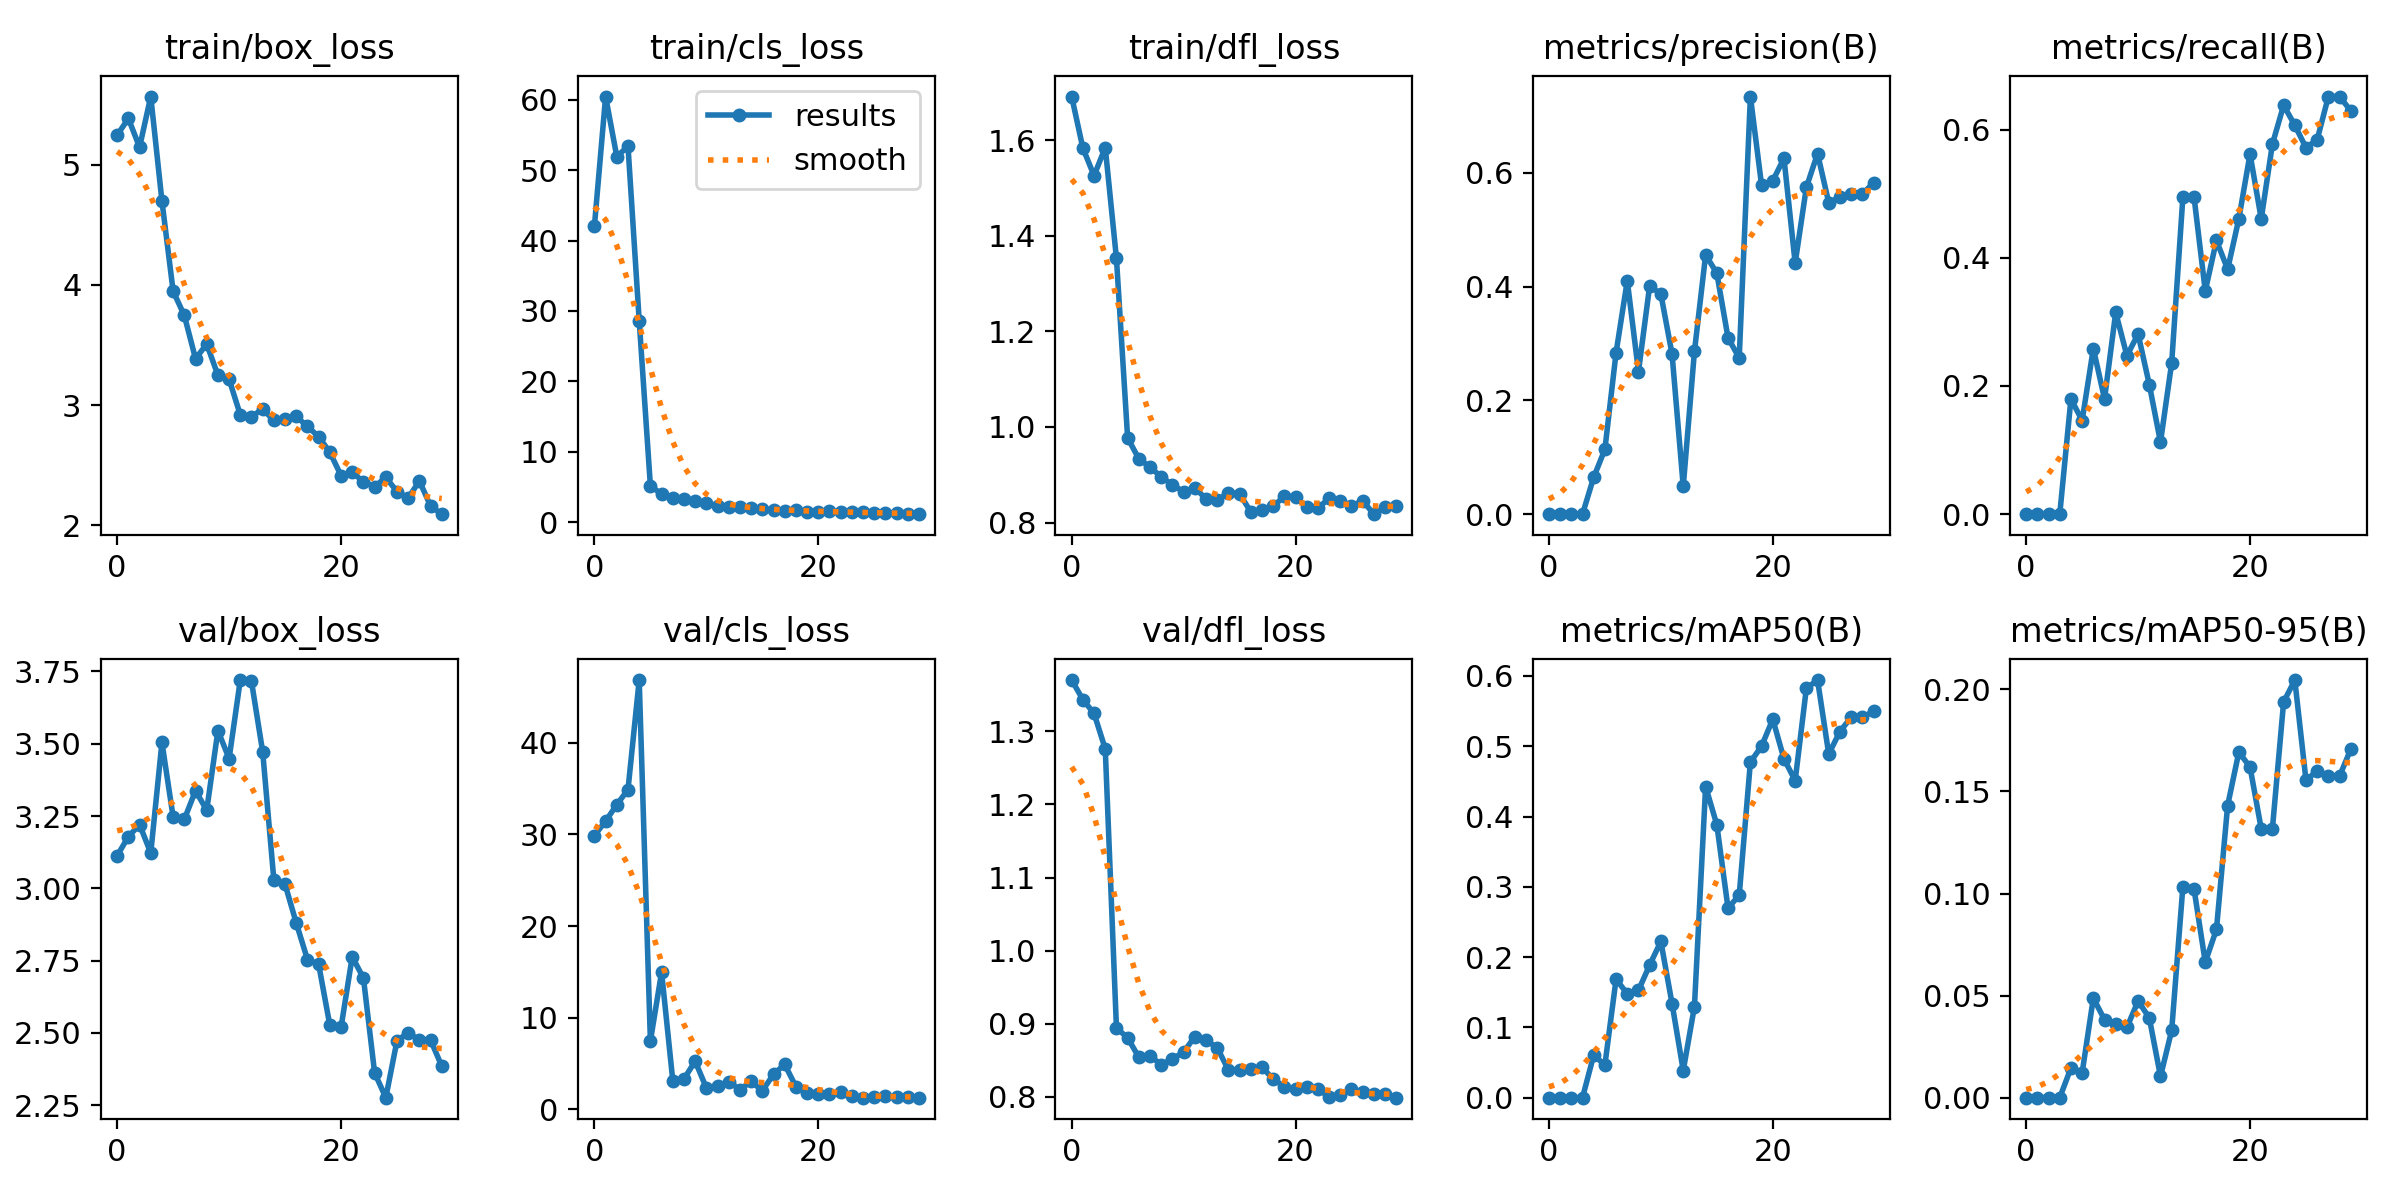

In [ ]:
%cd {root_dir}
Image(filename=f'{root_dir}/runs/detect/train/results.png', width=1000)